<a href="https://colab.research.google.com/github/nattntn/ViT-VisionTransformer_Regression_Deeptooth/blob/main/ViT_6_10_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!pip install tensorflow-addons==0.16.1
!pip install vit-keras

# Import

In [ ]:
import os
import numpy as np
# import efficientnet.tfkeras

from vit_keras import vit, utils
from tensorflow.keras.models import load_model
# validation
import pandas as pd
import tensorflow as tf

# Load Model

In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/ViT/6_10_ViT_1e-7_50.h5")
model.summary()

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

# Data Preparation

In [ ]:
train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/table_cut_images/Train_Table_normal.csv')
train

In [ ]:
train = train.iloc[:,1:]

In [ ]:
DATA_PATH = "/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'Normal')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'Test')
print(test_dir)

In [9]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Age(year)',
        class_mode = 'raw',
        color_mode= 'rgb',
        target_size=(height, width), # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        batch_size=batch_size)

#label
#labels = (train_generator.class_indices)
#labels = dict((v,k) for k,v in labels.items())
#print(labels)

Found 4189 validated image filenames.


In [10]:
test = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/table_cut_images/Test.csv')
test

,Unnamed: 0,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg
1,1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg
2,2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg
3,3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg
4,4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg
...,...,...,...,...,...,...,...
938,938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg
939,939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg
940,940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg
941,941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg


In [11]:
test = test.iloc[:,1:]
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg
...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg


# Predict

In [12]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [14]:
predict_image(path[0])[0]

1/1 [==============================] - 4s 4s/step


6.842095

In [15]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 312ms/step


In [16]:
pred_list

[6.842095,
 6.821155,
 6.8601937,
 6.80938,
 6.799651,
 6.815164,
 6.784309,
 6.782426,
 6.808453,
 6.7944403,
 6.807142,
 6.8436484,
 6.7781806,
 6.785115,
 6.83147,
 6.8397546,
 6.9091506,
 6.8332267,
 6.7846494,
 6.77643,
 6.7988214,
 6.799307,
 6.8428802,
 6.8233094,
 6.792346,
 6.835057,
 7.632747,
 6.811112,
 6.803,
 7.5635333,
 6.847778,
 6.7855506,
 6.7910156,
 6.8144784,
 6.8352747,
 6.79944,
 6.7972817,
 6.8075833,
 6.7820354,
 6.840573,
 6.8022103,
 6.796885,
 6.7942405,
 7.8725343,
 7.846474,
 6.8331666,
 6.786159,
 6.8027678,
 6.794987,
 8.917085,
 7.9209876,
 6.8466883,
 6.80149,
 7.864301,
 7.912315,
 7.8896365,
 7.902848,
 6.985785,
 6.8395953,
 7.8551793,
 7.8707547,
 7.870339,
 7.857819,
 8.869718,
 8.853666,
 7.9839664,
 8.008985,
 7.887917,
 7.8829913,
 6.87763,
 6.826898,
 8.098935,
 8.771399,
 6.818095,
 6.810388,
 8.883155,
 8.8729725,
 6.8470464,
 7.0783544,
 8.883155,
 8.8729725,
 7.8630795,
 7.835192,
 8.224235,
 7.904568,
 7.9568524,
 7.791554,
 8.743243,
 8.

In [17]:
print(type(pred_list))

<class 'list'>


In [18]:
pred_int = np.around(pred_list)

In [19]:
test['Predict_float'] = pred_list
test['Predict_int'] = pred_int
# แสดง DataFrame
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.842095,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,6.821155,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.860194,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,6.809380,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.799651,7.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,22.977259,23.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,23.185535,23.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.002247,19.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,22.675695,23.0


In [20]:
# test.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/ViT/Table_test_Estimate_Age(ViT:3,000Epochs).csv')

# Evaluate (All)

In [26]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [27]:
pred

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        8.,  7.,  7.,  8.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  8.,  8.,  7.,  7.,  7.,  7.,  9.,  8.,  7.,
        7.,  8.,  8.,  8.,  8.,  7.,  7.,  8.,  8.,  8.,  8.,  9.,  9.,
        8.,  8.,  8.,  8.,  7.,  7.,  8.,  9.,  7.,  7.,  9.,  9.,  7.,
        7.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  8.,  9.,
        8.,  8.,  8., 11., 11.,  9.,  9., 10., 10.,  9.,  9.,  8.,  8.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  8.,  8.,  9.,  9.,  9.,
        9.,  9.,  8.,  8.,  9.,  9.,  8.,  9.,  9.,  9., 10.,  9.,  9.,
        8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10.,
        9.,  9., 10.,  9., 11., 11.,  9.,  9., 10.,  9.,  7.,  7., 10.,
        9.,  7.,  7., 10., 10., 11., 10., 10., 10.,  9., 10., 10.,  9.,
        9.,  8.,  9.,  8.,  8., 10., 11.,  8.,  9.,  8.,  8.,  9

## confusion_matrix

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 30.434782608695652%
              precision    recall  f1-score   support

           7       0.77      0.92      0.84        50
           8       0.52      0.54      0.53        48
           9       0.50      0.66      0.57        50
          10       0.44      0.37      0.40        49
          11       0.61      0.46      0.52        50
          12       0.53      0.75      0.62        48
          13       0.49      0.42      0.45        50
          14       0.23      0.30      0.26        47
          15       0.21      0.22      0.21        51
          16       0.19      0.16      0.17        50
          17       0.09      0.06      0.07        51
          18       0.15      0.22      0.18        50
          19       0.06      0.04      0.05        49
          20       0.13      0.10      0.11        49
          21       0.03      0.04      0.04        50
          22       0.13      0.18      0.15        50
          23       0.15      0.20      

Text(0.5, 76.24999999999999, 'Predicted label')

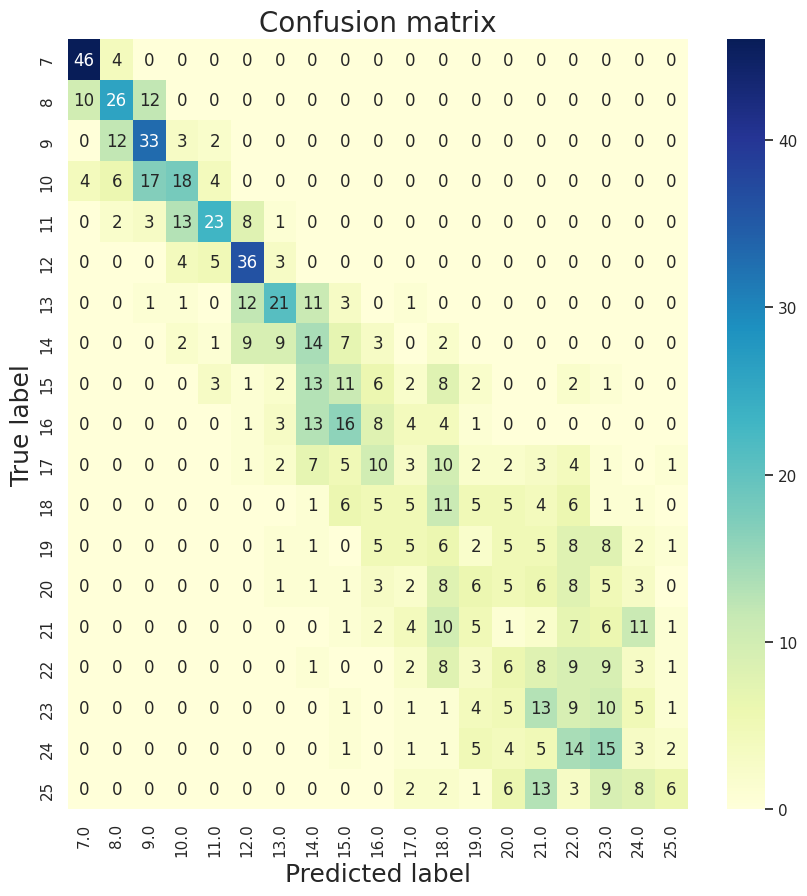

In [29]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.5429480381760339
MSE: 4.942735949098622
RMSE: 2.2232264727415023


# Evaluate (7-15)

In [31]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.842095,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,6.821155,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.860194,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,6.809380,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.799651,7.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,22.977259,23.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,23.185535,23.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.002247,19.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,22.675695,23.0


In [32]:
Under = test[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 15)]
Under

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.842095,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,6.821155,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.860194,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,6.809380,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.799651,7.0
...,...,...,...,...,...,...,...,...
920,12,M,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipOO101.jpg,11.812469,12.0
921,12,M,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,OO98.jpg,11.892146,12.0
922,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY95.jpg,17.952574,18.0
923,14,F,Abnormal,Lt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipY187.jpg,11.872628,12.0


## confusion_matrix

In [33]:
pred_under = np.array( Under['Predict_int'].tolist()) #แปลงเป็น array
act_under = np.array( Under['Age(year)'].tolist())

In [34]:
pred_under

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        8.,  7.,  7.,  8.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  8.,  8.,  7.,  7.,  7.,  7.,  9.,  8.,  7.,
        7.,  8.,  8.,  8.,  8.,  7.,  7.,  8.,  8.,  8.,  8.,  9.,  9.,
        8.,  8.,  8.,  8.,  7.,  7.,  8.,  9.,  7.,  7.,  9.,  9.,  7.,
        7.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  8.,  9.,
        8.,  8.,  8., 11., 11.,  9.,  9., 10., 10.,  9.,  9.,  8.,  8.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  8.,  8.,  9.,  9.,  9.,
        9.,  9.,  8.,  8.,  9.,  9.,  8.,  9.,  9.,  9., 10.,  9.,  9.,
        8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10.,
        9.,  9., 10.,  9., 11., 11.,  9.,  9., 10.,  9.,  7.,  7., 10.,
        9.,  7.,  7., 10., 10., 11., 10., 10., 10.,  9., 10., 10.,  9.,
        9.,  8.,  9.,  8.,  8., 10., 11.,  8.,  9.,  8.,  8.,  9

In [35]:
act_under

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_under, pred_under )
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_under, pred_under))#performance

classifier accuracy = 51.46726862302483%
              precision    recall  f1-score   support

         7.0       0.77      0.92      0.84        50
         8.0       0.52      0.54      0.53        48
         9.0       0.50      0.66      0.57        50
        10.0       0.44      0.37      0.40        49
        11.0       0.61      0.46      0.52        50
        12.0       0.55      0.75      0.63        48
        13.0       0.58      0.42      0.49        50
        14.0       0.37      0.30      0.33        47
        15.0       0.52      0.22      0.31        51
        16.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        19.0       0.00      0.00      0.00         0
        22.0       0.00      0.00      0.00         0
        23.0       0.00      0.00      0.00         0

    accuracy                           0.51       443
   macro avg       0.32      0.31      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

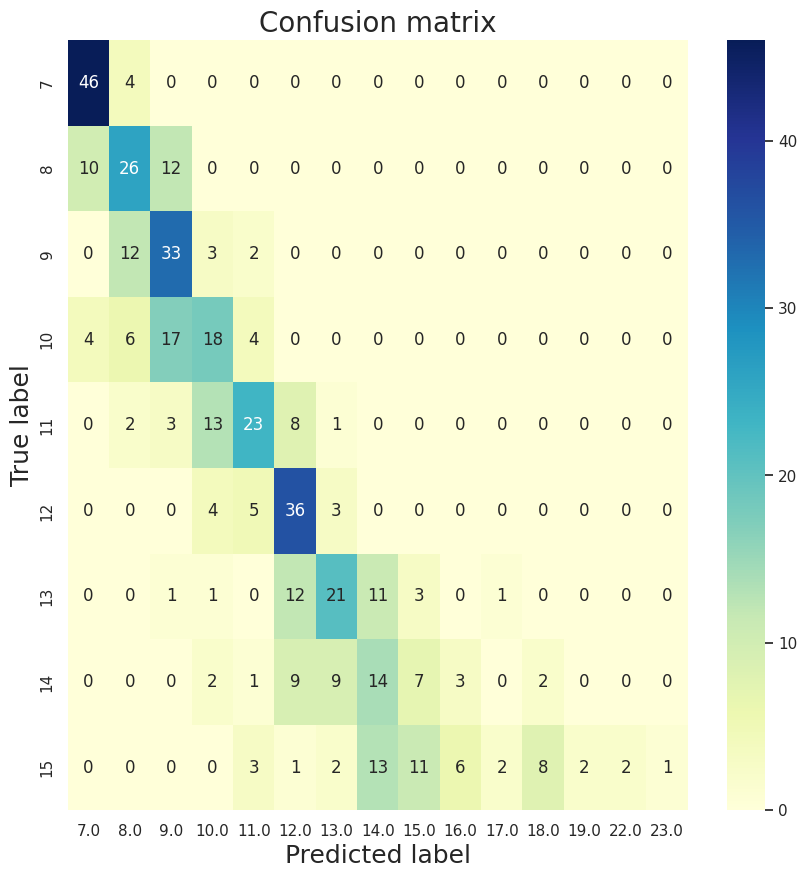

In [37]:
#create CF
data = {'Actual': act_under,'Predicted' : pred_under }
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_under, pred_under )

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_under,pred_under)
mse = mean_squared_error(act_under,pred_under)
rmse = mean_squared_error(act_under,pred_under,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.7584650112866818
MSE: 1.7607223476297968
RMSE: 1.3269221332202568


# Evaluate (16-25)

In [39]:
Upper = test[~test['Age(year)'].isin(Under['Age(year)'])]
Upper

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
426,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T159.jpg,13.907171,14.0
427,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT159.jpg,14.619991,15.0
428,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T177.jpg,15.351381,15.0
429,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipT177.jpg,15.304574,15.0
430,16,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,T178.jpg,15.456495,15.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,22.977259,23.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,23.185535,23.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.002247,19.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,22.675695,23.0


## confusion_matrix

In [40]:
pred_upper = np.array( Upper['Predict_int'].tolist()) #แปลงเป็น array
act_upper = np.array( Upper['Age(year)'].tolist())

In [41]:
pred_upper

array([14., 15., 15., 15., 15., 16., 17., 17., 17., 16., 14., 18., 14.,
       14., 18., 19., 16., 15., 15., 18., 16., 15., 14., 16., 18., 14.,
       14., 16., 16., 13., 15., 15., 15., 15., 15., 15., 15., 17., 16.,
       15., 15., 14., 14., 14., 14., 12., 16., 16., 15., 15., 17., 16.,
       14., 14., 18., 18., 17., 17., 18., 16., 20., 16., 13., 14., 20.,
       19., 18., 16., 14., 22., 21., 22., 16., 16., 18., 18., 18., 21.,
       21., 19., 22., 22., 16., 18., 18., 18., 15., 15., 14., 15., 25.,
       23., 14., 14., 12., 16., 17., 19., 21., 16., 22., 15., 18., 18.,
       18., 18., 17., 17., 18., 19., 24., 23., 15., 14., 19., 18., 18.,
       18., 22., 21., 20., 16., 16., 15., 15., 16., 22., 18., 22., 19.,
       16., 21., 20., 15., 15., 17., 17., 18., 18., 19., 20., 22., 22.,
       21., 20., 20., 17., 17., 19., 16., 20., 20., 22., 22., 18., 20.,
       20., 23., 18., 18., 24., 24., 19., 22., 22., 21., 16., 16., 20.,
       14., 21., 25., 23., 23., 23., 21., 23., 23., 22., 22., 17

In [42]:
act_upper

array([16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_upper, pred_upper)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_upper, pred_upper))#performance

classifier accuracy = 11.8%
              precision    recall  f1-score   support

        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.24      0.16      0.19        50
        17.0       0.10      0.06      0.07        51
        18.0       0.18      0.22      0.20        50
        19.0       0.06      0.04      0.05        49
        20.0       0.13      0.10      0.11        49
        21.0       0.03      0.04      0.04        50
        22.0       0.13      0.18      0.15        50
        23.0       0.16      0.20      0.18        50
        24.0       0.08      0.06      0.07        51
        25.0       0.46      0.12      0.19        50

    accuracy                           0.12       500
   macro avg       0.11      0.08      0.09       500
weighted avg       0.16      0.12      0.13       50

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

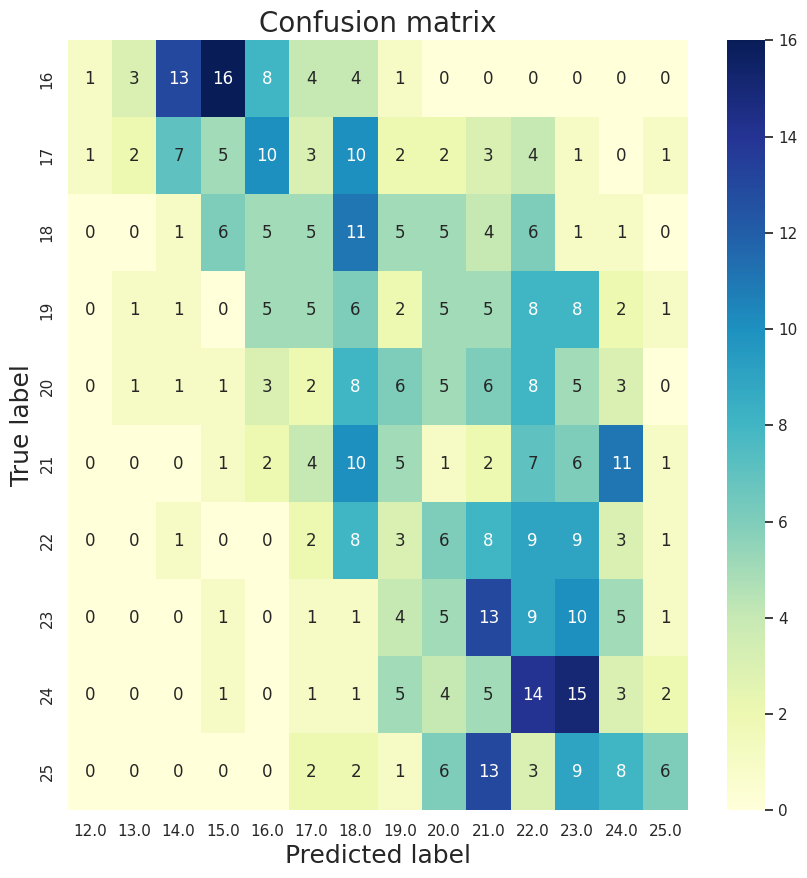

In [44]:
#create CF
data = {'Actual': act_upper,'Predicted' : pred_upper}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_upper, pred_upper)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_upper,pred_upper)
mse = mean_squared_error(act_upper,pred_upper)
rmse = mean_squared_error(act_upper,pred_upper,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 2.238
MSE: 7.762
RMSE: 2.7860366113890174


# Evaluate Under-Upper

In [46]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.842095,7.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,6.821155,7.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.860194,7.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,6.809380,7.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.799651,7.0
...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,22.977259,23.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,23.185535,23.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.002247,19.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,22.675695,23.0


In [47]:
test.loc[(test['Age(year)'] >= 7) & (test['Age(year)'] <= 15), 'age'] = '7 - 15 years'
test.loc[(test['Age(year)'] >= 16) & (test['Age(year)'] <= 25), 'age'] = '16 - 25 years'

In [48]:
test.loc[(test['Predict_int'] >= 7) & (test['Predict_int'] <= 15), 'age_pred'] = '7 - 15 years'
test.loc[(test['Predict_int'] >= 16) & (test['Predict_int'] <= 25), 'age_pred'] = '16 - 25 years'

In [49]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int,age,age_pred
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.842095,7.0,7 - 15 years,7 - 15 years
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,6.821155,7.0,7 - 15 years,7 - 15 years
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.860194,7.0,7 - 15 years,7 - 15 years
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,6.809380,7.0,7 - 15 years,7 - 15 years
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.799651,7.0,7 - 15 years,7 - 15 years
...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,22.977259,23.0,16 - 25 years,16 - 25 years
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,23.185535,23.0,16 - 25 years,16 - 25 years
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.002247,19.0,16 - 25 years,16 - 25 years
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,22.675695,23.0,16 - 25 years,16 - 25 years


In [50]:
test.loc[(test['Predict_int'] >= 7) & (test['Predict_int'] <= 15), 'age_pred'] = '7 - 15 years'
test.loc[(test['Predict_int'] >= 16) & (test['Predict_int'] <= 25), 'age_pred'] = '16 - 25 years'

In [51]:
test[test.isna().any(axis=1)]

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int,age,age_pred


## confusion_matrix

In [52]:
pred_age = np.array( test['age_pred'].tolist()) #แปลงเป็น array
act_age = np.array( test['age'].tolist())

In [53]:
pred_age

array(['7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
      

In [54]:
act_age

array(['7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
       '7 - 15 years', '7 - 15 years', '7 - 15 years', '7 - 15 years',
      

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act_age, pred_age)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_age, pred_age))#performance

classifier accuracy = 90.34994697773065%
               precision    recall  f1-score   support

16 - 25 years       0.94      0.87      0.91       500
 7 - 15 years       0.87      0.94      0.90       443

     accuracy                           0.90       943
    macro avg       0.90      0.91      0.90       943
 weighted avg       0.91      0.90      0.90       943



Text(0.5, 76.24999999999999, 'Predicted label')

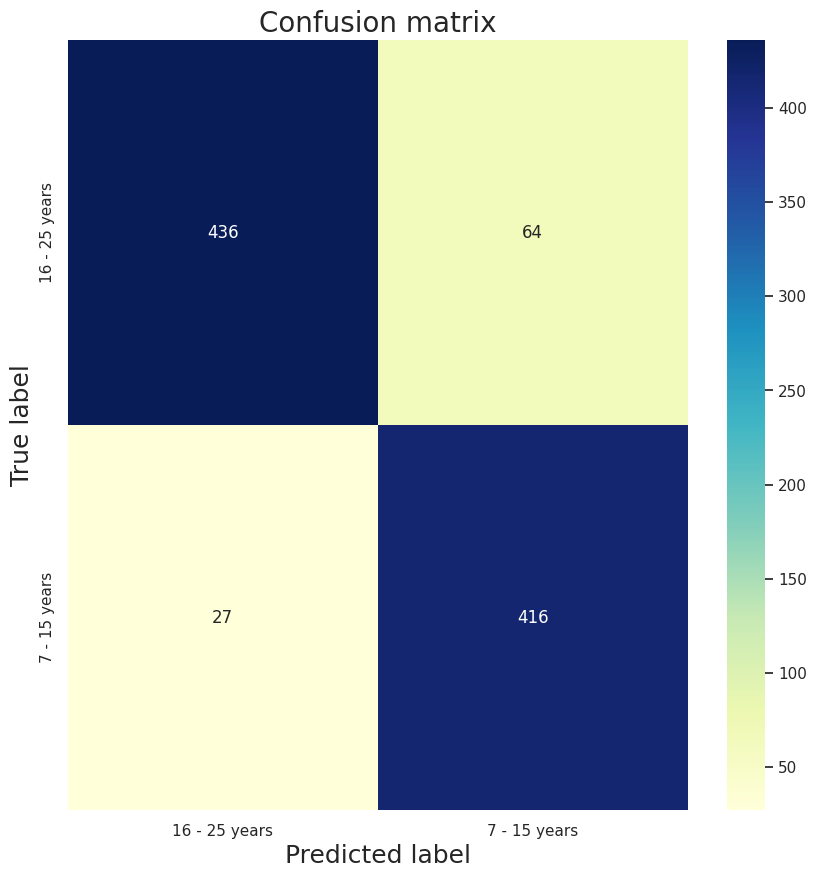

In [56]:
#create CF
data = {'Actual': act_age,'Predicted' : pred_age}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_age, pred_age)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## MSE and MAE

In [57]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int,age,age_pred
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.842095,7.0,7 - 15 years,7 - 15 years
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,6.821155,7.0,7 - 15 years,7 - 15 years
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.860194,7.0,7 - 15 years,7 - 15 years
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,6.809380,7.0,7 - 15 years,7 - 15 years
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.799651,7.0,7 - 15 years,7 - 15 years
...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,22.977259,23.0,16 - 25 years,16 - 25 years
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,23.185535,23.0,16 - 25 years,16 - 25 years
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.002247,19.0,16 - 25 years,16 - 25 years
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,22.675695,23.0,16 - 25 years,16 - 25 years


In [58]:
test.loc[test['age'] == '7 - 15 years', 'age_int'] = 0
test.loc[test['age'] == '16 - 25 years', 'age_int'] = 1
test.loc[test['age_pred'] == '7 - 15 years', 'age_pred_int'] = 0
test.loc[test['age_pred'] == '16 - 25 years', 'age_pred_int'] = 1

In [59]:
test

,Age(year),Gender,Folder_type,Folder_name,Path_Name,Filename,Predict_float,Predict_int,age,age_pred,age_int,age_pred_int
0,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V69.jpg,6.842095,7.0,7 - 15 years,7 - 15 years,0.0,0.0
1,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV69.jpg,6.821155,7.0,7 - 15 years,7 - 15 years,0.0,0.0
2,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V70.jpg,6.860194,7.0,7 - 15 years,7 - 15 years,0.0,0.0
3,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,FlipV70.jpg,6.809380,7.0,7 - 15 years,7 - 15 years,0.0,0.0
4,7,F,Normal,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,V74.jpg,6.799651,7.0,7 - 15 years,7 - 15 years,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
938,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J132.jpg,22.977259,23.0,16 - 25 years,16 - 25 years,1.0,1.0
939,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J145.jpg,23.185535,23.0,16 - 25 years,16 - 25 years,1.0,1.0
940,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J149.jpg,19.002247,19.0,16 - 25 years,16 - 25 years,1.0,1.0
941,25,F,Abnormal,Rt,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,J158.jpg,22.675695,23.0,16 - 25 years,16 - 25 years,1.0,1.0


In [60]:
pred_age_int = np.array( test['age_pred_int'].tolist()) #แปลงเป็น array
act_age_int = np.array( test['age_int'].tolist())

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(act_age_int,pred_age_int)
mse = mean_squared_error(act_age_int,pred_age_int)
rmse = mean_squared_error(act_age_int,pred_age_int,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.09650053022269353
MSE: 0.09650053022269353
RMSE: 0.31064534476263045
